In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFE

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report
)

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Handling class imbalance
from imblearn.over_sampling import SMOTE


In [ ]:
data = pd.read_csv("/content/GlobalWeather.csv")

In [ ]:
data.dtypes

,0
country,object
location_name,object
latitude,float64
longitude,float64
timezone,object
last_updated_epoch,int64
last_updated,object
temperature_celsius,float64
temperature_fahrenheit,float64
condition_text,object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49501 entries, 0 to 49500
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       49501 non-null  object 
 1   location_name                 49501 non-null  object 
 2   latitude                      49501 non-null  float64
 3   longitude                     49501 non-null  float64
 4   timezone                      49501 non-null  object 
 5   last_updated_epoch            49501 non-null  int64  
 6   last_updated                  49501 non-null  object 
 7   temperature_celsius           49501 non-null  float64
 8   temperature_fahrenheit        49501 non-null  float64
 9   condition_text                49501 non-null  object 
 10  wind_mph                      49501 non-null  float64
 11  wind_kph                      49501 non-null  float64
 12  wind_degree                   49501 non-null  int64  
 13  w

In [ ]:
data.dtypes

,0
country,object
location_name,object
latitude,float64
longitude,float64
timezone,object
last_updated_epoch,int64
last_updated,object
temperature_celsius,float64
temperature_fahrenheit,float64
condition_text,object


In [ ]:
data.shape

(49501, 41)

In [ ]:
data.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,49501.000000,49501.000000,4.950100e+04,49501.000000,49501.000000,49501.000000,49501.000000,49501.000000,49501.000000,49501.000000,...,49501.000000,49501.000000,49501.000000,49501.000000,49501.000000,49501.000000,49501.000000,49501.000000,49501.000000,49501.000000
mean,19.140966,22.204052,1.726879e+09,22.963972,73.336609,8.284489,13.336619,170.876104,1013.762429,29.935799,...,19.274574,518.095094,62.797481,14.149308,10.717643,23.702077,46.666473,1.656492,2.527828,49.418254
std,24.480948,65.790750,6.411428e+06,9.207223,16.572897,9.830255,15.818984,103.163971,7.067456,0.208597,...,17.525583,991.118389,37.697226,25.865444,51.782360,45.740677,141.741469,0.963904,2.482158,34.793533
min,-41.300000,-175.200000,1.715849e+09,-24.800000,-12.600000,2.200000,3.600000,1.000000,971.000000,28.670000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.185000,0.185000,1.000000,1.000000,0.000000
25%,3.750000,-6.250000,1.721220e+09,18.200000,64.800000,4.000000,6.500000,82.000000,1010.000000,29.830000,...,10.800000,220.300000,37.000000,0.900000,0.700000,4.800000,7.770000,1.000000,1.000000,15.000000
50%,17.250000,23.320000,1.726916e+09,25.300000,77.500000,6.900000,11.200000,164.000000,1013.000000,29.910000,...,17.000000,310.800000,59.000000,2.960000,2.100000,12.025000,18.870000,1.000000,2.000000,49.000000
75%,40.400000,50.580000,1.732437e+09,29.000000,84.200000,11.600000,18.700000,258.000000,1017.000000,30.030000,...,25.700000,480.700000,83.000000,14.430000,7.955000,26.600000,42.500000,2.000000,3.000000,83.000000
max,64.150000,179.220000,1.737887e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,1080.000000,31.890000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,5858.020000,6.000000,10.000000,100.000000


In [ ]:
data.isnull().sum()

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


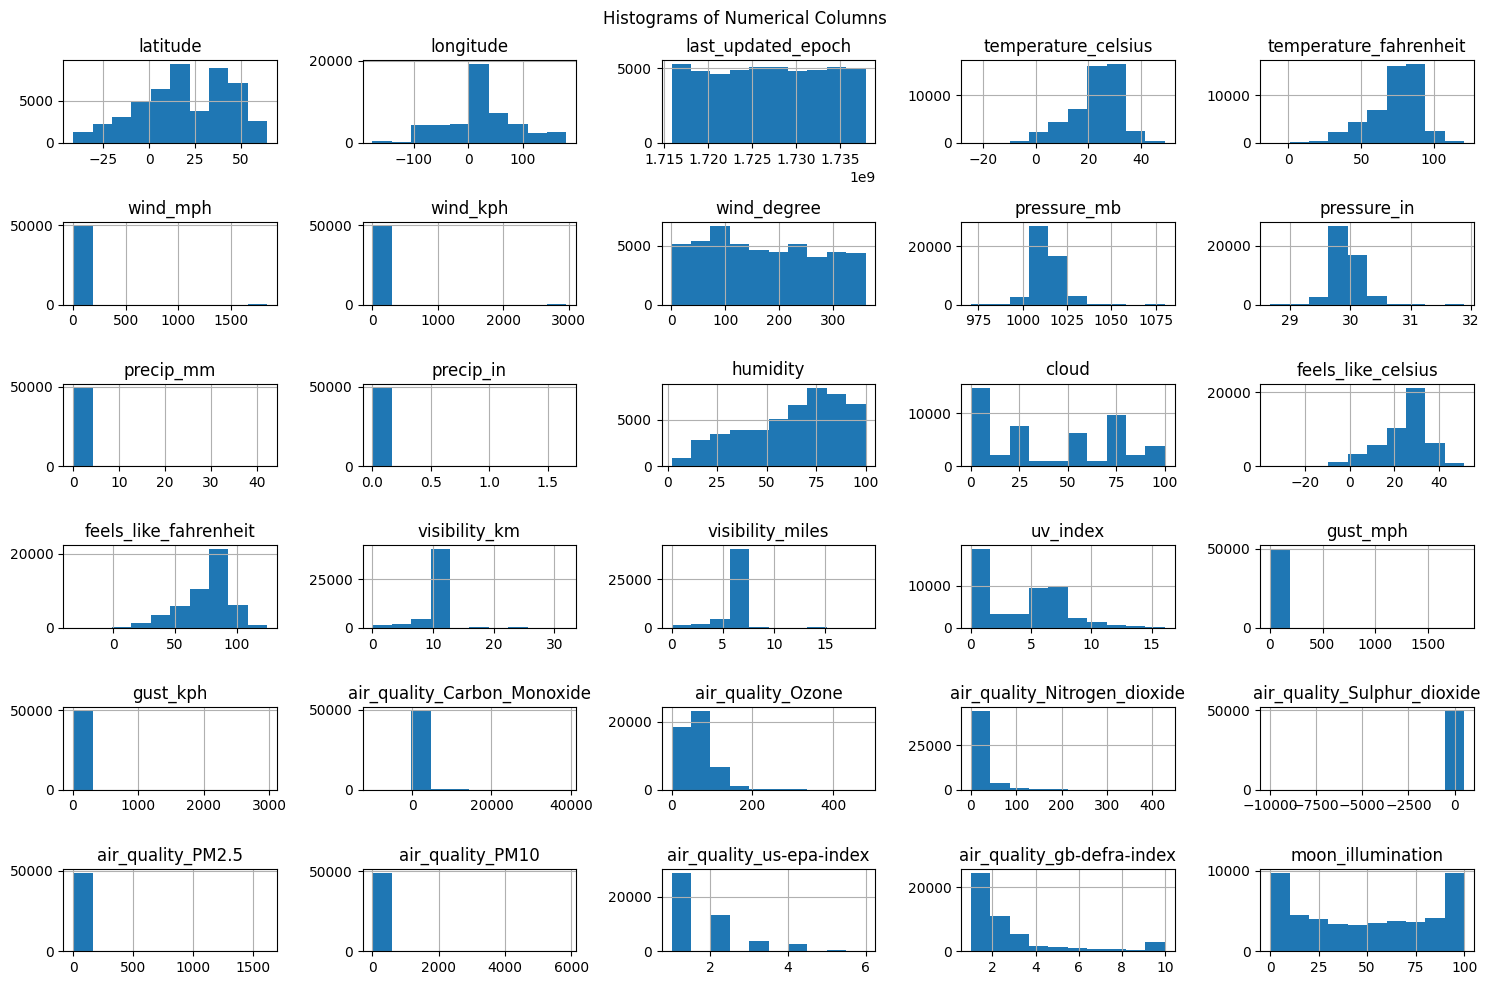

In [ ]:
# Histogram for numerical columns
data.hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns')
plt.tight_layout()
plt.show()

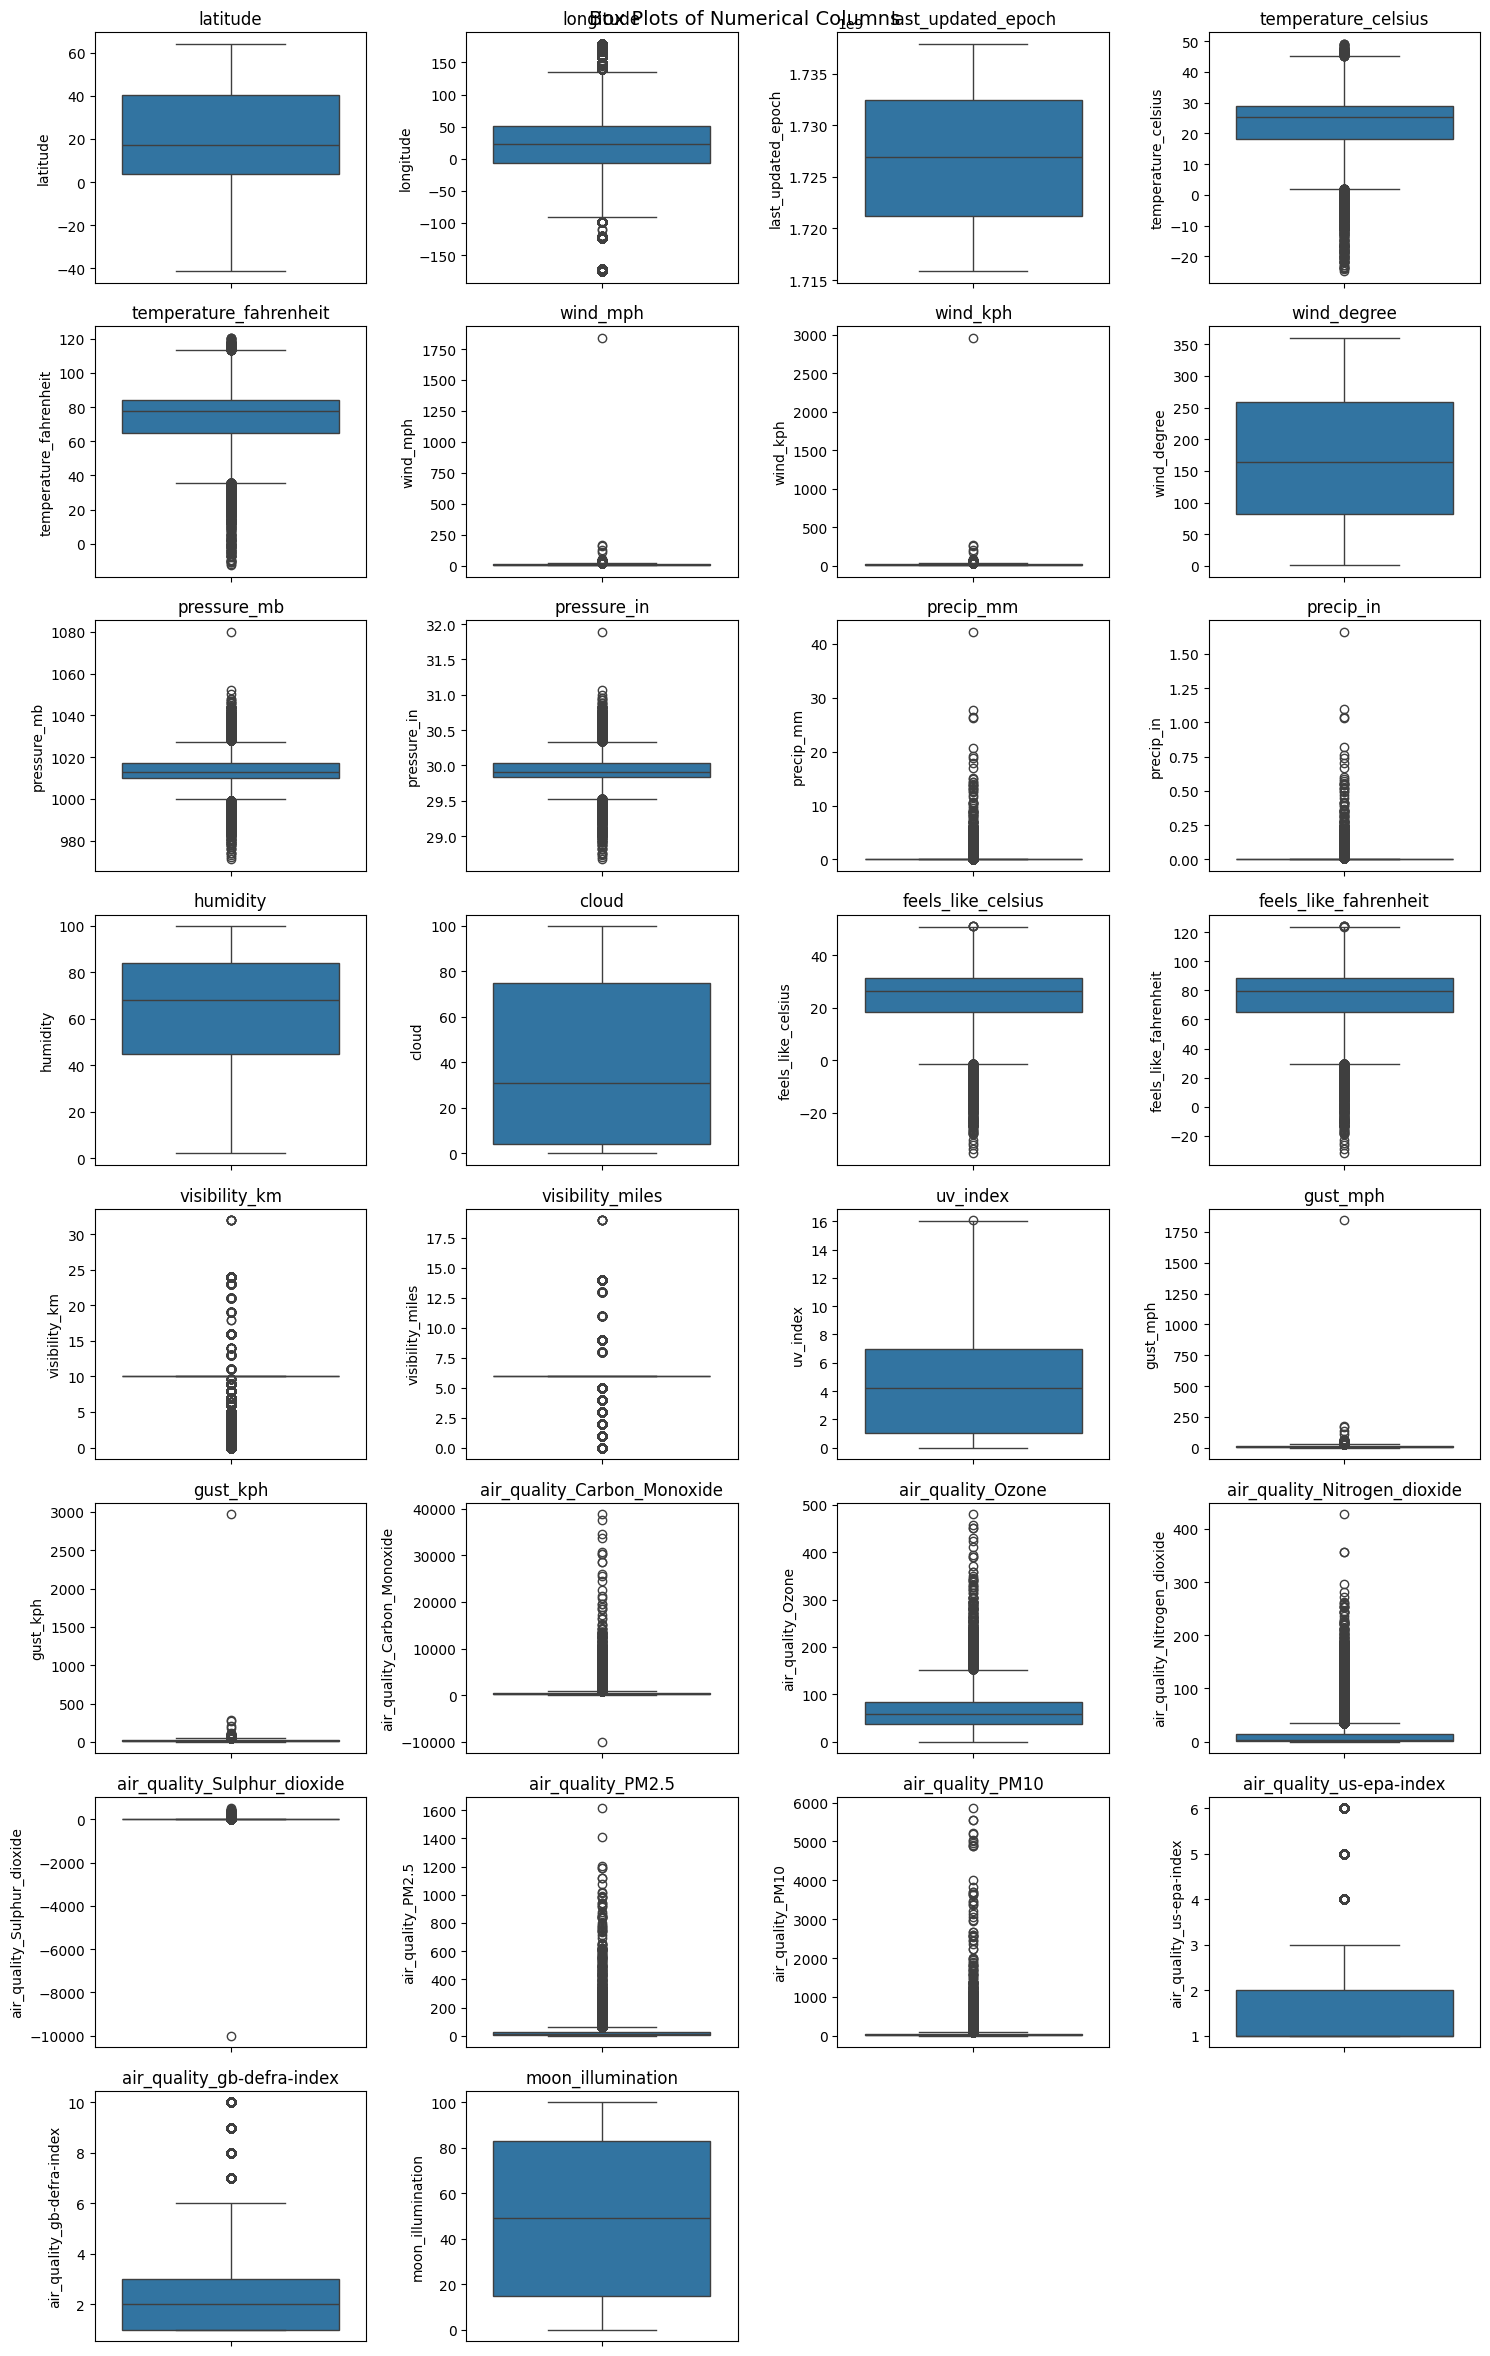

In [ ]:
num_cols = data.select_dtypes(include=['number']).columns  # Get numerical columns
n = len(num_cols)  # Count of numerical columns
rows = (n // 4) + (n % 4 > 0)  # Calculate rows, 4 plots per row
plt.figure(figsize=(15, rows * 3))  # Adjust figure size
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 4, i)  # Create subplots in a grid
    sns.boxplot(y=data[col])  # Boxplot for each column
    plt.title(col)  # Set title
plt.suptitle('Box Plots of Numerical Columns', fontsize=14)
plt.tight_layout()
plt.show()

<ipython-input-11-1e9f5938aecf>:17: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-1e9f5938aecf>:17: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


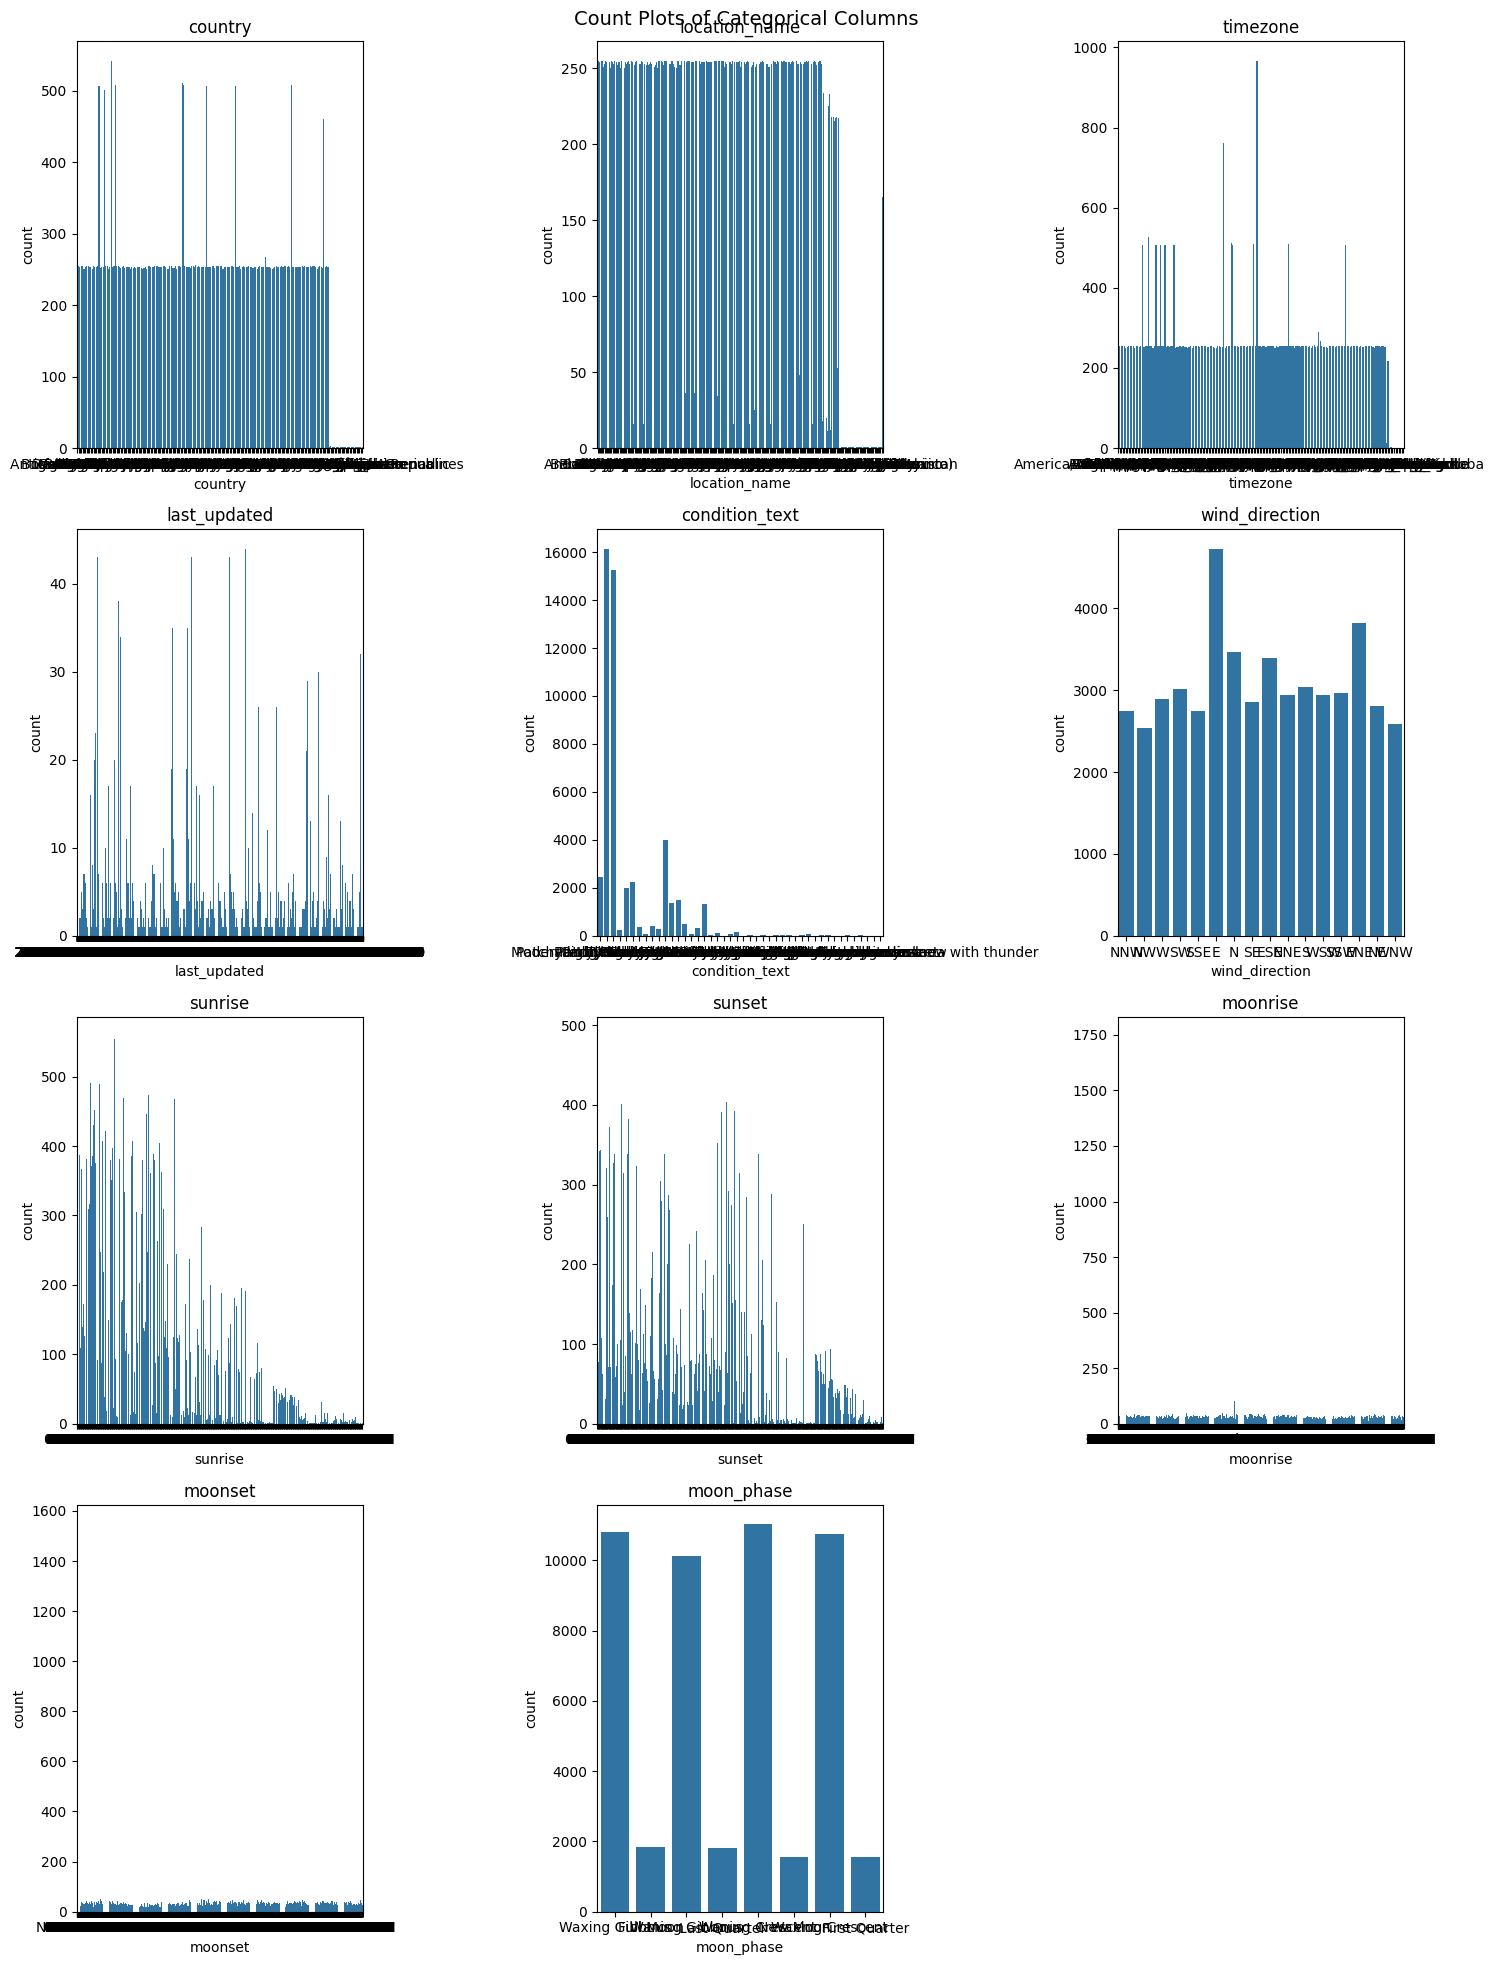

In [ ]:


# Get categorical columns
cat_cols = data.select_dtypes(include=['object']).columns

# Set up the grid layout
rows = (len(cat_cols) + 2) // 3
cols = min(3, len(cat_cols))

plt.figure(figsize=(15, 5 * rows))

# Loop through columns and create count plots
for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(x=data[col])
    plt.title(col)

plt.suptitle('Count Plots of Categorical Columns', fontsize=14)
plt.tight_layout()
plt.show()

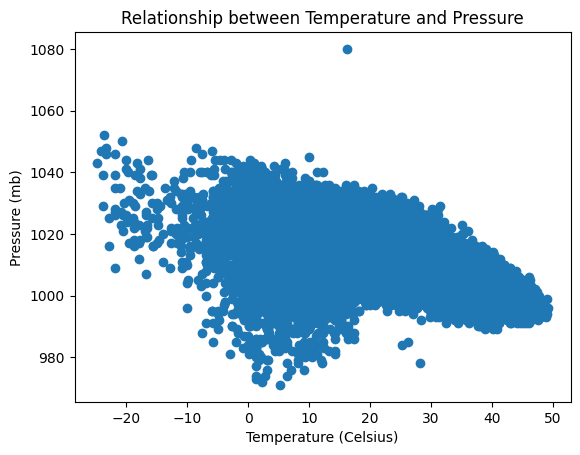

In [ ]:
plt.scatter(data["temperature_celsius"], data["pressure_mb"])
plt.title("Relationship between Temperature and Pressure")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Pressure (mb)")
plt.show()

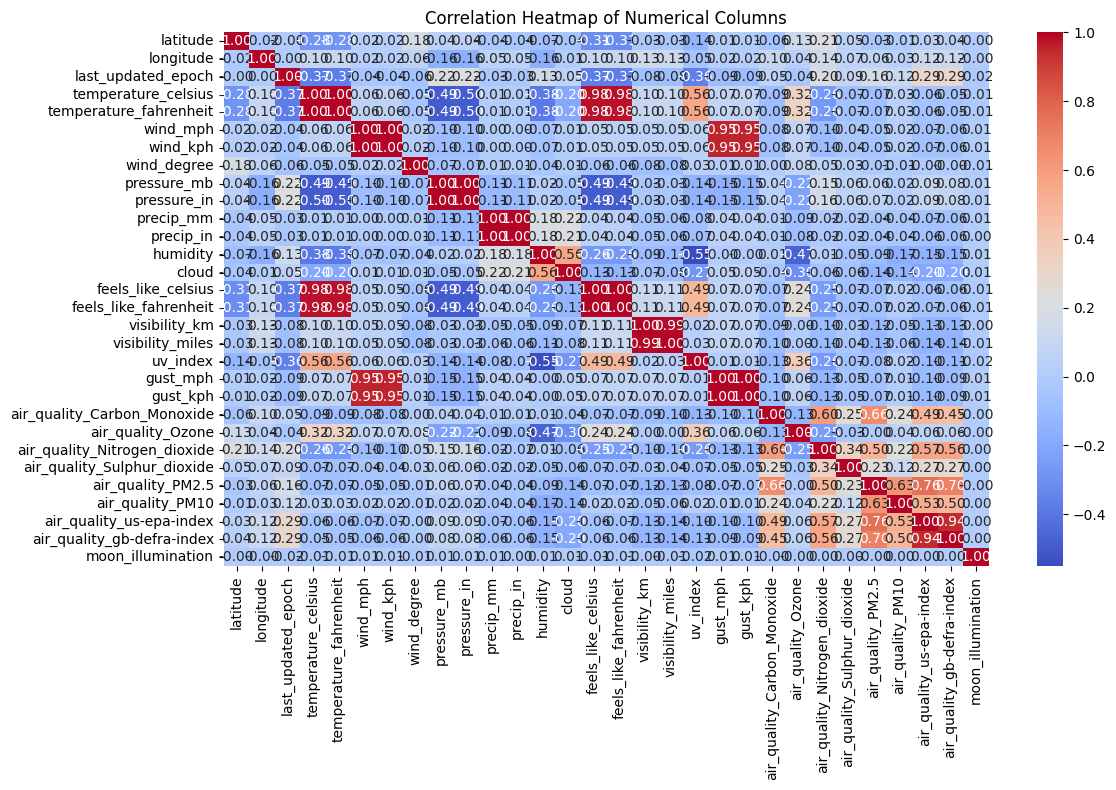

In [ ]:
# Filter numerical columns for correlation heatmap
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for numerical columns
corr_matrix = data[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.tight_layout()
plt.show()


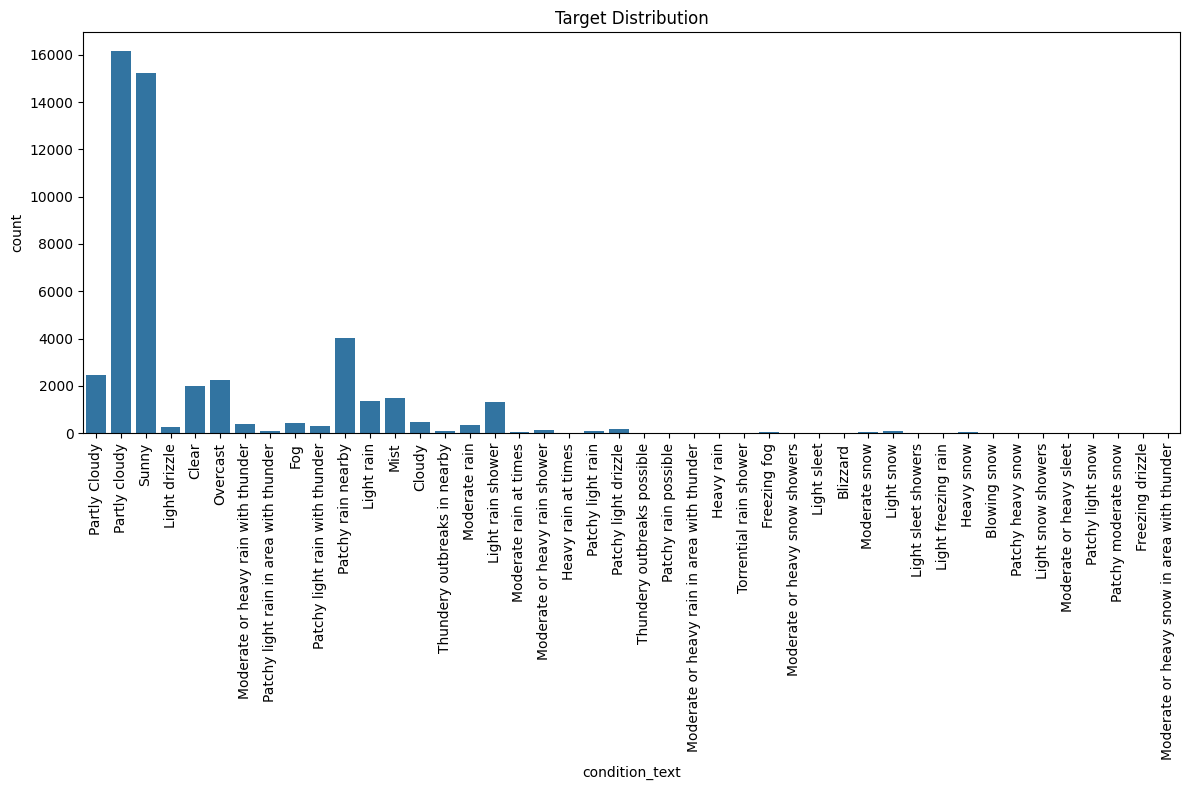

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x="condition_text", data=data)
plt.title("Target Distribution")
plt.xticks(rotation=90)  # Rotate labels by 45 degrees
plt.tight_layout()
plt.show()


In [ ]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000, multi_class=False):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.multi_class = multi_class
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        if self.multi_class:
            self.weights = np.zeros((n_features, n_classes))
            self.bias = np.zeros((1, n_classes))
            y_one_hot = np.eye(n_classes)[y]
        else:
            self.weights = np.zeros(n_features)
            self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            if self.multi_class:
                probabilities = self.softmax(linear_model)
                gradients_w = np.dot(X.T, (probabilities - y_one_hot)) / n_samples
                gradients_b = np.sum(probabilities - y_one_hot, axis=0) / n_samples
            else:
                probabilities = self.sigmoid(linear_model)
                gradients_w = np.dot(X.T, (probabilities - y)) / n_samples
                gradients_b = np.sum(probabilities - y) / n_samples

            self.weights -= self.learning_rate * gradients_w
            self.bias -= self.learning_rate * gradients_b

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.softmax(linear_model) if self.multi_class else self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return np.argmax(probabilities, axis=1) if self.multi_class else (probabilities >= threshold).astype(int)


In [ ]:
label_encoder = LabelEncoder()
for col in ["country", "location_name", "timezone", "last_updated", "condition_text",
            "wind_direction", "sunrise", "sunset", "moonrise", "moonset", "moon_phase"]:
    data[col] = label_encoder.fit_transform(data[col])

# Prepare data
X = data.drop(["condition_text"], axis=1).values  # Ensure it's a NumPy array
y = data["condition_text"].values  # Convert to NumPy array



In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
lr_model = RandomForestClassifier(random_state=42)

In [ ]:
lr_model = RandomForestClassifier(random_state=42)

In [ ]:
lr_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluation Metrics for Training Set:
Accuracy: 0.8304
Precision (macro): 0.4450
Recall (macro): 0.2592
F1-Score (macro): 0.2829
Confusion Matrix:
[[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0 1403 ...    0    0    0]
 ...
 [   0    0    1 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


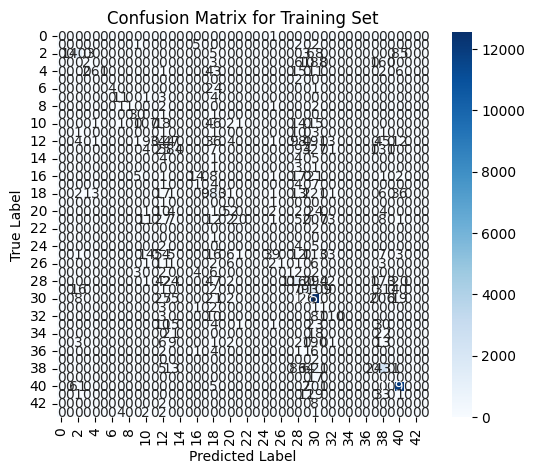

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluation Metrics for Test Set:
Accuracy: 0.8020
Precision (macro): 0.2967
Recall (macro): 0.2234
F1-Score (macro): 0.2373
Confusion Matrix:
[[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0  384 ...   31    0    0]
 ...
 [   0    0   26 ... 2899    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


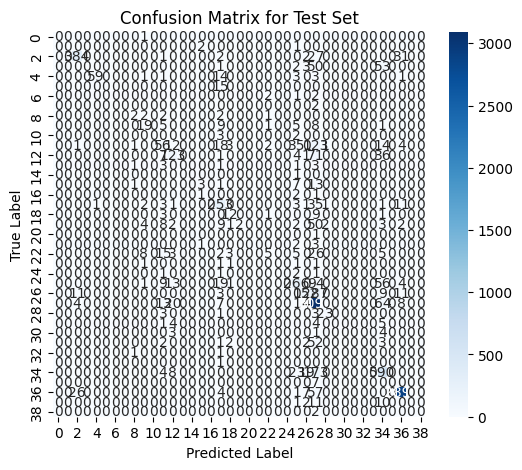

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(y_true, y_pred, set_name):
    accuracy = accuracy_score(y_true, y_pred)

    # Check if it's binary or multi-class classification
    if len(set(y_true)) > 2:  # Multi-class case
        avg_method = 'macro'  # Options: 'micro', 'macro', 'weighted'
    else:  # Binary case
        avg_method = 'binary'

    precision = precision_score(y_true, y_pred, average=avg_method)
    recall = recall_score(y_true, y_pred, average=avg_method)
    f1 = f1_score(y_true, y_pred, average=avg_method)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"\nEvaluation Metrics for {set_name} Set:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision ({avg_method}): {precision:.4f}")
    print(f"Recall ({avg_method}): {recall:.4f}")
    print(f"F1-Score ({avg_method}): {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {set_name} Set")
    plt.show()
evaluate_model(y_train, y_train_pred, "Training")
evaluate_model(y_test, y_test_pred, "Test")



In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)

In [ ]:
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [ ]:
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluation Metrics for Training Set:
Accuracy: 0.8304
Precision (macro): 0.4450
Recall (macro): 0.2592
F1-Score (macro): 0.2829
Confusion Matrix:
[[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0 1403 ...    0    0    0]
 ...
 [   0    0    1 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


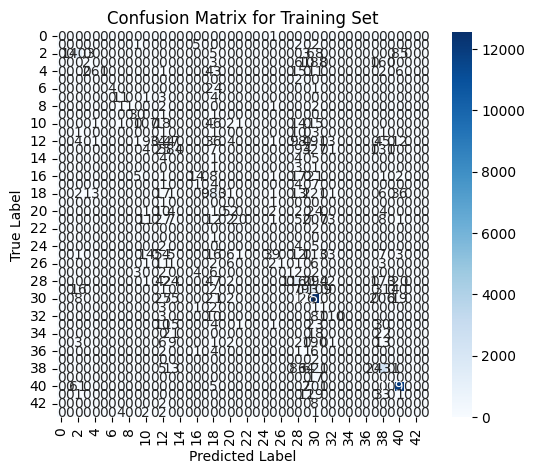

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluation Metrics for Test Set:
Accuracy: 0.8020
Precision (macro): 0.2967
Recall (macro): 0.2234
F1-Score (macro): 0.2373
Confusion Matrix:
[[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0  384 ...   31    0    0]
 ...
 [   0    0   26 ... 2899    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


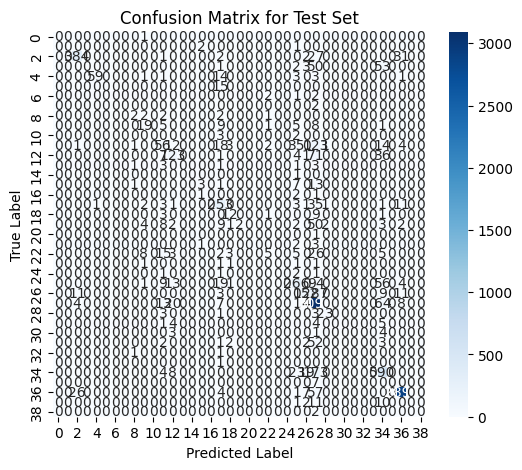

In [ ]:
y_test_proba = svm_model.predict_proba(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


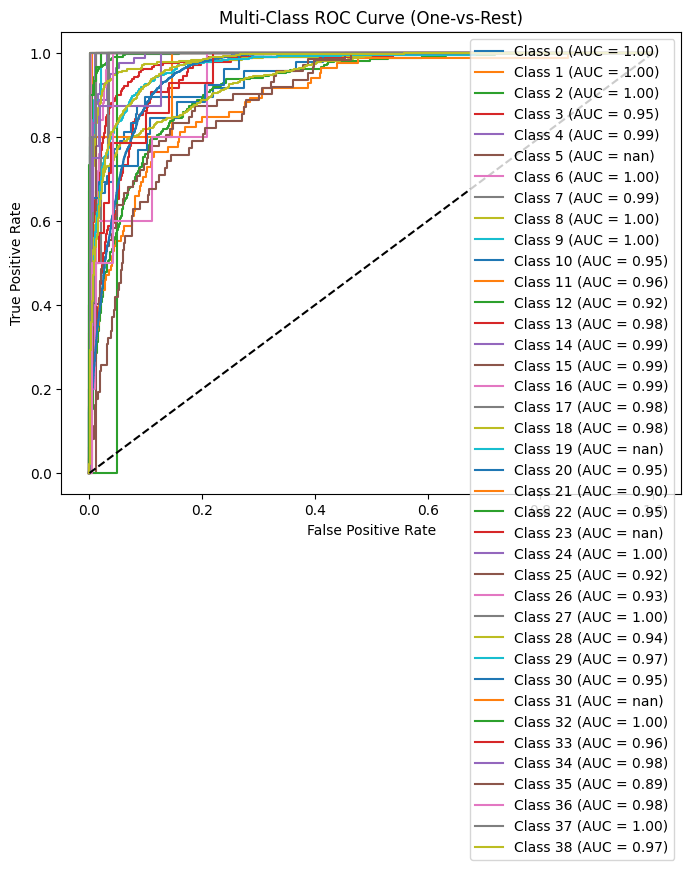

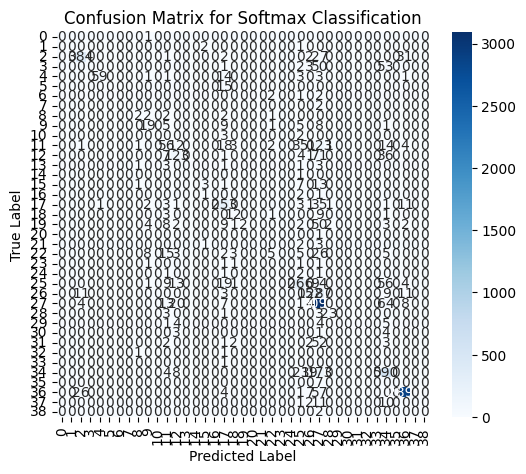

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluation Metrics for Training Set:
Accuracy: 0.8304
Precision (macro): 0.4450
Recall (macro): 0.2592
F1-Score (macro): 0.2829
Confusion Matrix:
[[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0 1403 ...    0    0    0]
 ...
 [   0    0    1 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


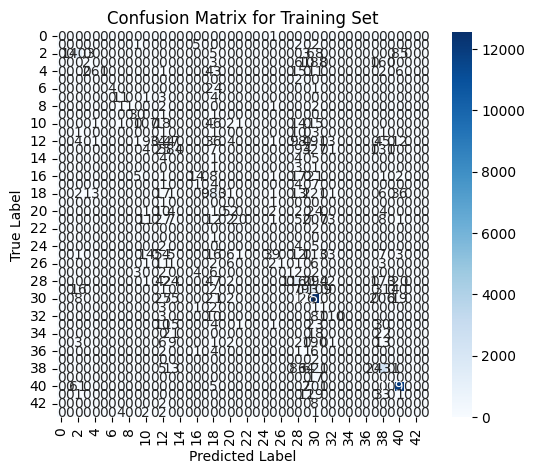

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluation Metrics for Test Set:
Accuracy: 0.8020
Precision (macro): 0.2967
Recall (macro): 0.2234
F1-Score (macro): 0.2373
Confusion Matrix:
[[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0  384 ...   31    0    0]
 ...
 [   0    0   26 ... 2899    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


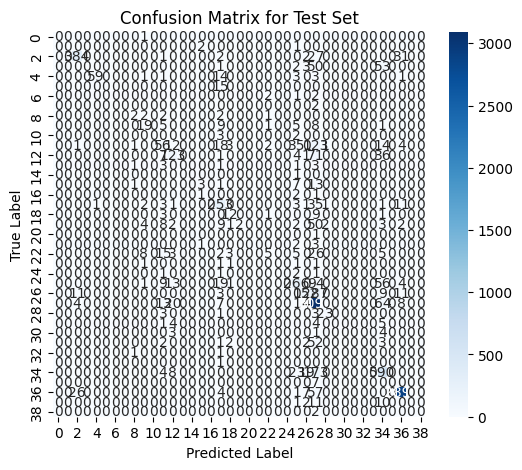

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Compute ROC Curve for Multi-Class (One-vs-Rest)
def plot_multi_class_roc(y_test, y_test_proba, num_classes):
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_test == i, y_test_proba[:, i])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multi-Class ROC Curve (One-vs-Rest)")
    plt.legend()
    plt.show()

# Plot Confusion Matrix for Multi-Class
def plot_conf_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(len(set(y_true))), yticklabels=range(len(set(y_true))))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Example Usage (Replace with actual model outputs)
num_classes = len(set(y_test))  # Number of unique classes
plot_multi_class_roc(y_test, y_test_proba, num_classes)
plot_conf_matrix(y_test, y_test_pred, "Confusion Matrix for Softmax Classification")
evaluate_model(y_train, y_train_pred, "Training")
evaluate_model(y_test, y_test_pred, "Test")
y_test_proba = svm_model.predict_proba(X_test)


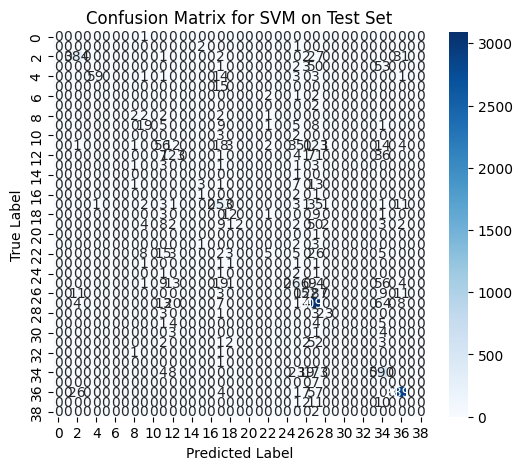

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Replacing 'auto' with valid options
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model and evaluate it on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define SVM model
svm = SVC(random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [3, 4, 5],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'coef0': [0, 0.1, 0.5],
    'shrinking': [True, False],
    'tol': [1e-3, 1e-4],
    'max_iter': [1000, -1]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model and evaluate it
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 5760 candidates, totalling 28800 fits
Best hyperparameters: {'C': 0.1, 'coef0': 0.5, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 1000, 'shrinking': True, 'tol': 0.001}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)  # Use multiple cores for large data
rf.fit(X_train, y_train)

# Get feature importances and select features
sfm = SelectFromModel(rf, threshold=0.1)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Train and evaluate with selected features
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)
y_pred = rf_selected.predict(X_test_selected)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use OneVsRestClassifier for multiclass/multilabel classification
svm = SVC(kernel='linear')

# Train the model
svm.fit(X_train, y_train)

# Use SelectFromModel based on the model coefficients
selector = SelectFromModel(svm, threshold="mean", max_features=2)  # Select features based on coefficient importance
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train with the selected features
classifier = OneVsRestClassifier(svm)
classifier.fit(X_train_selected, y_train)

# Make predictions and evaluate
y_pred = classifier.predict(X_test_selected)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.69      0.82        13
           2       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45

